In [ ]:
# k means clustering

# typically used for compressing data

# in this example a 128 pixel by 128 pixel image with each pixel having 8 bits of color information (hence 256 colors) 
# is transformed into 16 colors (k = 16), thus needing only 4 bits for color information.

# i.e.
# original image is 128x128x3 (3 indicating R,G, B colors)
# reshaped into 16384x3 (each pixel has 8 shades of R,G,B)
# after k-Means transformation, each pixel has 4 shades of R,G,B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for reading MATLAB files
from scipy.io import loadmat

In [3]:
# part 1

In [52]:
def findClosestCentroids(X, centroids):
    """
    return a [m,1] vector of centroid assignments for each element of X
    
    a subset of rows from X is taken as the initial centroids.
    the distance of each row in X from the centroids is computed.
    the elements in X are then assigned to the centroid it is nearest to.
    
    centroid is usually initialised to few random rows of X
    basically a row in the centroid (i.e. each centroid example) 
    is comparable to a row in X i.e if X is [m x n] the centroid is [K x n]
    
    c(i):= j that minimizes ||x(i) − µj||**2
    
    """

    m = X.shape[0]
    k = centroids.shape[0] # assuming is a numpy matrix
    
    idx = np.zeros(m)
    # array of indices to be returned
    # idx[i] is the index of the centroid which is assigned to X[i]    
 
    
    """
    for i in range (m):
        minDist = 1000000 #arbitrary large number        
        for j in range(k):
            # figure out distance of each row in X with all rows in centroids
            dist = np.sum(np.square(X[i,:] - centroids[j,:])) 
            if dist < minDist:
                minDist = dist
                idx[i] = j
    """
    
    #alternate implementation, avoiding double for loop
    
    for i in range(m):        
        distances = np.linalg.norm(X[i] - centroids, axis=1) #modular norm        
        # argmin returns the indices of the minimum values along an axis,
        j = np.argmin(distances)
        idx[i] = j
 
    return idx

In [41]:
# test findClosestCentroids

initialCentroids = np.array([[3, 3], [6, 2], [8, 5]])
initialCentroids

array([[3, 3],
       [6, 2],
       [8, 5]])

In [42]:
# use data2 file
path = "D:\Programming\TestData\ex7data2.mat"

data = loadmat(path)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [43]:
X = data['X']
X.shape

(300, 2)

In [58]:
idx = findClosestCentroids(X, initialCentroids)

In [9]:
idx.shape, idx[0:3]
# expected [0, 2, 1] => python is 0 indexed, unlike Octave which is 1 indexed

((300,), array([0., 2., 1.]))

In [10]:
# part 2

In [11]:
# compute mean and update centroids

def computeCentroids(X, idx, K):
  
    """
    returns the new centroids by 
    computing the means of the data points assigned to each centroid. 
    It is given 
    
    X - a dataset where each row is a single data point, 
    idx - a vector of centroid assignments (i.e. each entry in range [1..K]) for each example, 
    K - the number of centroids. 
    
    You should return centroids a matrix where each row is the mean of the data points
    assigned to that centroid
    
    """
    m,n = X.shape
        
    centroids = np.zeros((K,n))
    
    # X is [m x n], idx is [m x 1]
    # idx has 'm' rows and each row of idx (i.e. idx(i)) has a value between 1:K
    # so basically multiple rows of idx can have the same value
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx == k, :], axis=0) # mean along rows
        # multiple rows of idx can have the value k, we take mean in X across all such rows
        
    
    return centroids

In [12]:
# test computeCentroids

In [13]:
K = 3

In [14]:
centroids = computeCentroids(X, idx, K)
centroids # should be [[2.42830111, 3.15792418],[5.81350331, 2.63365645],s7.11938687, 3.6166844 ]]

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [15]:
# part 3

In [16]:
def runKMeans(X, initialCentroids, maxIters):
    
    m, n = X.shape
    k = initialCentroids.shape[0]
    
    idx = np.zeros(m)
    
    centroids = np.zeros((k, n))
    centroids = initialCentroids
    
    for i in range(maxIters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, k)    
    
    return idx, centroids

In [17]:
maxIters = 10
idx, centroids = runKMeans(X, initialCentroids, maxIters)

In [18]:
idx.shape, centroids

((300,),
 array([[1.95399466, 5.02557006],
        [3.04367119, 1.01541041],
        [6.03366736, 3.00052511]]))

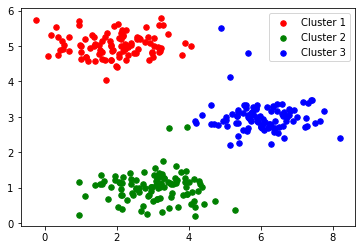

In [19]:
# since K = 3 (i.e. 3 centroids, or 3 clusters)

#cluster1 = X[np.where(idx == 0)[0],:]
#cluster2 = X[np.where(idx == 1)[0],:]
#cluster3 = X[np.where(idx == 2)[0],:]

# alternate implememtation

cluster1 = X[idx == 0, :] # all rows X[i] such that idx[i] = 0
cluster2 = X[idx == 1, :] # all rows X[i] such that idx[i] = 1
cluster3 = X[idx == 2, :] # all rows X[i] such that idx[i] = 2

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [20]:
# note this

In [21]:
cluster1.shape, cluster2.shape, cluster3.shape

((98, 2), (102, 2), (100, 2))

In [22]:
np.mean(cluster1, axis = 0), np.mean(cluster2, axis = 0), np.mean(cluster3, axis = 0)

(array([1.95399466, 5.02557006]),
 array([3.04367119, 1.01541041]),
 array([6.03366736, 3.00052511]))

In [23]:
# end note

In [24]:
# part 4

In [25]:
def kMeansInitCentroids(X, k):
    """
    initializing centroids to random rows from the dataset X
    """
    m, n = X.shape
    
    centroids = np.zeros((k, n))
    
    #randidx = np.random.permutation(X)
    randidx = np.random.randint(0, m, k)
    
    centroids = X[randidx, :]
    
    return centroids

In [26]:
# test kMeansInitCentroids
k = 3
initCentroids = kMeansInitCentroids(X, k)

In [27]:
initCentroids

array([[4.18450011, 0.45356203],
       [2.84734459, 0.26759253],
       [1.91909566, 5.57848447]])

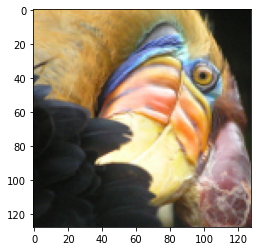

In [45]:
# load image of bird

#imgPath = "D:\Programming\TestData\Bird_small.mat"
#imgData = loadmat(imgPath)

imgPath = "D:\Programming\TestData\Bird_small.png"
img = plt.imread(imgPath)

plt.imshow(img)

In [46]:
img.shape

(128, 128, 3)

In [63]:
imgPath = "D:\Programming\TestData\Bird_small.mat"
imgData = loadmat(imgPath)

imgData.keys()


dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [64]:
A = imgData['A']
A.shape

(128, 128, 3)

In [65]:
# preprocess image data

# normalize data
A = A / 255

# reshape data
Ximg = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # X is of form [128*128, 3]
Ximg.shape

(16384, 3)

In [84]:
# initialize 16 centroids
k = 16

initCentroids = kMeansInitCentroids(Ximg, k)
initCentroids.shape

(16, 3)

In [85]:
# run k means 10 times

maxIters = 10
idx, centroids  = runKMeans(Ximg, initCentroids, maxIters)

idx.shape, centroids.shape


((16384,), (16, 3))

In [86]:
# find closest centroids in Ximg
idx = findClosestCentroids(Ximg, centroids)

# compress data in Ximg by mapping each element to it's centroid
# i.e. XcompImg has 16384 total rows with only 16 unique variants
# i.e. image color info reduced from 16384 colors to 16 colors
XcompImg = centroids[idx.astype(int), :] # array indices should be int or boolean

In [87]:
XcompImg.shape

(16384, 3)

In [88]:
# reshape to original dimensions
XcompImg = np.reshape(XcompImg, (A.shape[0], A.shape[1], A.shape[2])) # X is of form [128*128, 3]
XcompImg.shape

(128, 128, 3)

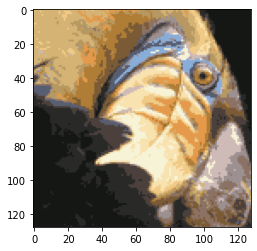

In [89]:
plt.imshow(XcompImg)